In [1]:
import pandas as pd
import pytz
import datetime
import calendar
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
DATA_DIRECTORY = "/media/host_data/lions/"

In [3]:
df_nb = pd.read_csv(DATA_DIRECTORY + 'google_northbound.csv', index_col='time', parse_dates=True)
df_sb = pd.read_csv(DATA_DIRECTORY + 'google_southbound.csv', index_col='time', parse_dates=True)
df_nb.index = df_nb.index.tz_localize(pytz.timezone('UTC'))
df_sb.index = df_sb.index.tz_localize(pytz.timezone('UTC'))
df_nb.index = df_nb.index.tz_convert(pytz.timezone('America/Vancouver'))
df_sb.index = df_sb.index.tz_convert(pytz.timezone('America/Vancouver'))

In [4]:
df_map = pd.read_csv(DATA_DIRECTORY + 'map.csv', index_col='time', parse_dates=True)
df_map.index = df_map.index.tz_localize(pytz.timezone('UTC'))
df_map.index = df_map.index.tz_convert(pytz.timezone('America/Vancouver'))
df_map['lane2_int'] = df_map.apply(lambda x: 1 if x['lane2'] == 'up' else -1 if x['lane2'] == 'down' else 0, axis=1)

In [5]:
df_sign = pd.read_csv(DATA_DIRECTORY + 'sign.csv', index_col='time', parse_dates=True)
df_sign.index = df_sign.index.tz_localize(pytz.timezone('UTC'))
df_sign.index = df_sign.index.tz_convert(pytz.timezone('America/Vancouver'))

In [17]:
def viz_day(date):
    fig, ax1 = plt.subplots(figsize=(12,6))
    plt.title(date + ' ' + calendar.day_name[datetime.datetime.strptime(date,'%Y-%m-%d').weekday()])
    ax2 = ax1.twinx()
    s1 = ax1.plot(df_map[date].index,df_map[date]['lane2_int'],color='b',label='Center Lane Direction')
    ax1.set_ylim([-1.2,1.2])
    s2 = ax2.plot(df_sign[date]['delay'],color='g', label='Sign Delay')
    s3 = ax2.plot(df_sb[date]['duration']/60,color='r', label='Google Southbound')
    s4 = ax2.plot(df_nb[date]['duration']/60,color='black', label='Google Northbound')
    
    series = s1 + s2 + s3 + s4
    labs = [s.get_label() for s in series]
    ax1.legend(series, labs, loc='upper left')

<IPython.core.display.Javascript object>


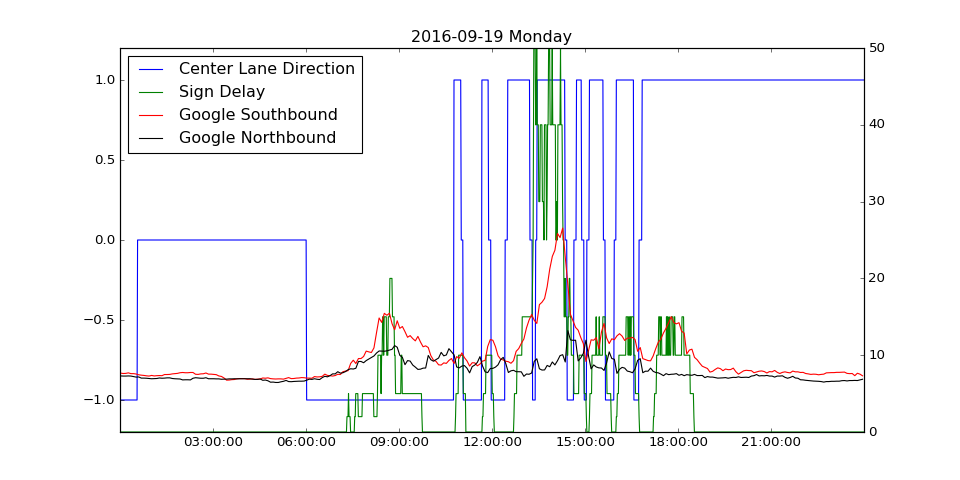

In [18]:
viz_day('2016-09-19')

<IPython.core.display.Javascript object>


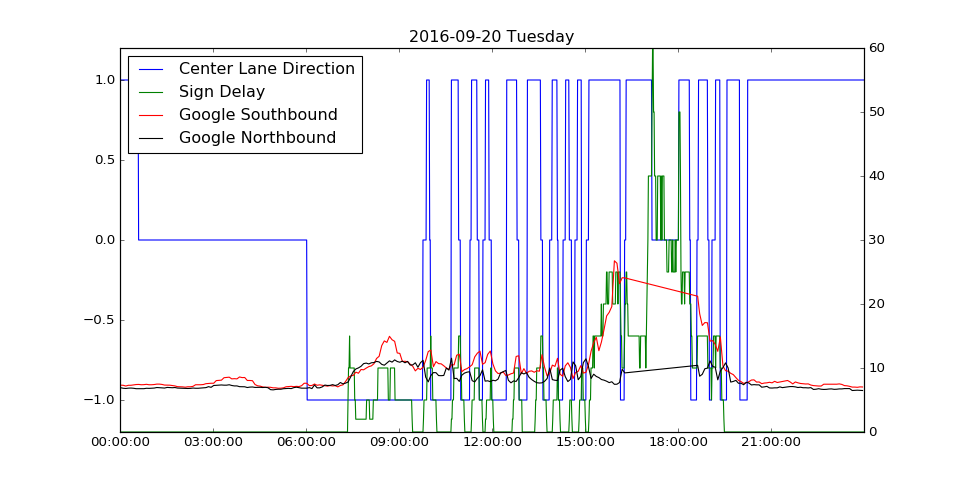

In [19]:
viz_day('2016-09-20')

<IPython.core.display.Javascript object>


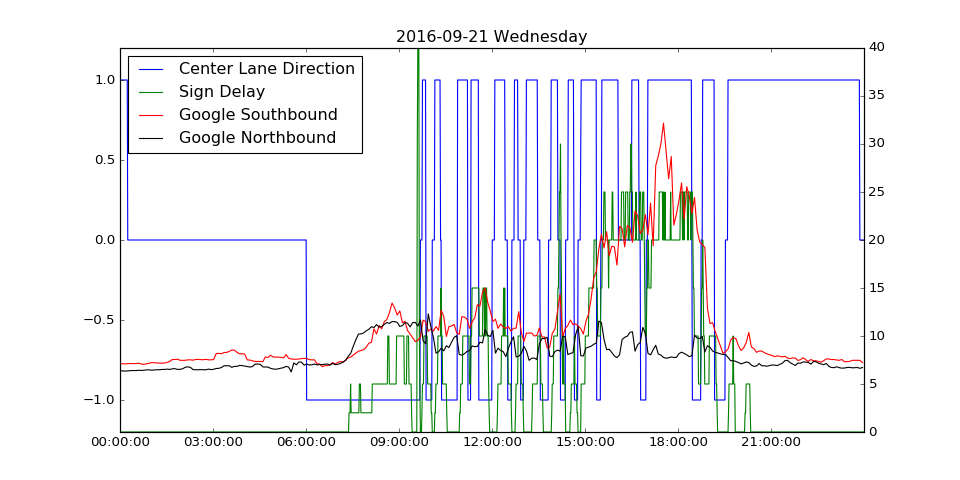

In [20]:
viz_day('2016-09-21')

<IPython.core.display.Javascript object>


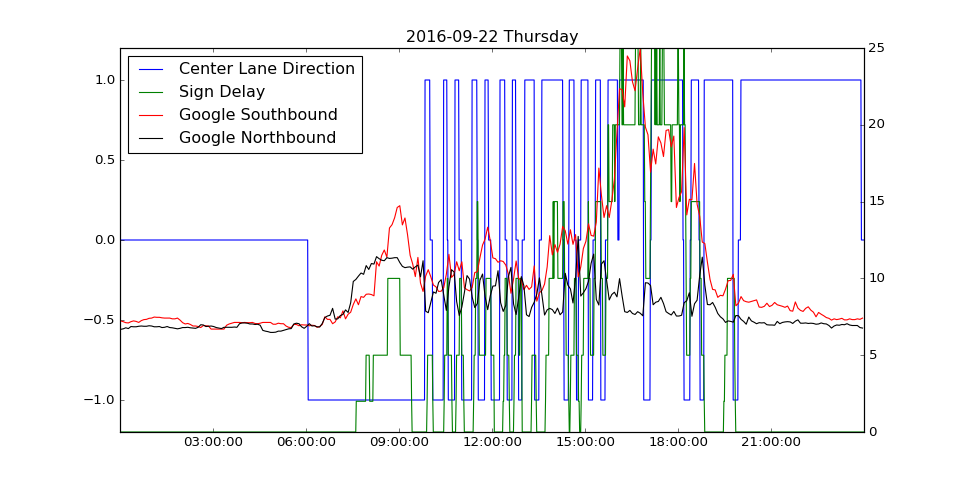

In [21]:
viz_day('2016-09-22')